In [9]:
import random
import math

#Euclidian Distance between two d-dimensional points
def eucldist(p0,p1):
    dist = 0.0
    for i in range(0,len(p0)):
        dist += (p0[i] - p1[i])**2
    return math.sqrt(dist)


    
#K-Means Algorithm
def kmeans(k,datapoints):

    # d - Dimensionality of Datapoints
    d = len(datapoints[0]) 
    
    #Limit our iterations
    Max_Iterations = 1000
    i = 0
    
    cluster = [0] * len(datapoints)
    prev_cluster = [-1] * len(datapoints)
    
    #Randomly Choose Centers for the Clusters
    cluster_centers = []
    for i in range(0,k):
        new_cluster = []
        #for i in range(0,d):
        #    new_cluster += [random.randint(0,10)]
        cluster_centers += [random.choice(datapoints)]
        
        
        #Sometimes The Random points are chosen poorly and so there ends up being empty clusters
        #In this particular implementation we want to force K exact clusters.
        #To take this feature off, simply take away "force_recalculation" from the while conditional.
        force_recalculation = False
    
    while (cluster != prev_cluster) or (i > Max_Iterations) or (force_recalculation) :
        
        prev_cluster = list(cluster)
        force_recalculation = False
        i += 1
    
        #Update Point's Cluster Alligiance
        for p in range(0,len(datapoints)):
            min_dist = float("inf")
            
            #Check min_distance against all centers
            for c in range(0,len(cluster_centers)):
                
                dist = eucldist(datapoints[p],cluster_centers[c])
                
                if (dist < min_dist):
                    min_dist = dist  
                    cluster[p] = c   # Reassign Point to new Cluster
        
        
        #Update Cluster's Position
        for k in range(0,len(cluster_centers)):
            new_center = [0] * d
            members = 0
            for p in range(0,len(datapoints)):
                if (cluster[p] == k): #If this point belongs to the cluster
                    for j in range(0,d):
                        new_center[j] += datapoints[p][j]
                    members += 1
            
            for j in range(0,d):
                if members != 0:
                    new_center[j] = new_center[j] / float(members) 
                
                #This means that our initial random assignment was poorly chosen
                #Change it to a new datapoint to actually force k clusters
                else: 
                    new_center = random.choice(datapoints)
                    force_recalculation = True
                    print ("Forced Recalculation...")
                    
            
            cluster_centers[k] = new_center
    
        
    print( "======== Results ========")
    print ("Clusters", cluster_centers)
    print ("Iterations",i)
    print ("Assignments", cluster)
    
    
#TESTING THE PROGRAM#
if __name__ == "__main__":
    #2D - Datapoints List of n d-dimensional vectors. (For this example I already set up 2D Tuples)
    #Feel free to change to whatever size tuples you want...
    datapoints = [(3,2),(2,2),(1,2),(0,1),(1,0),(1,1),(5,6),(7,7),(9,10),(11,13),(12,12),(12,13),(13,13)]

    k = 2 # K - Number of Clusters
      
    kmeans(k,datapoints) 

======== Results ========
Clusters [[10.666666666666666, 11.333333333333334], [1.8571428571428572, 2.0]]
Iterations 3
Assignments [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]


In [10]:
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

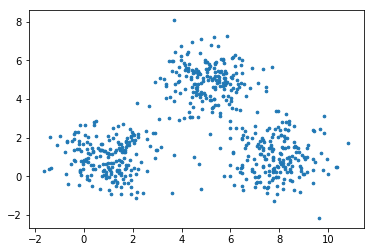

In [15]:
# Set three centers, the model should predict similar results
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random data and center it to the three centers
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7)

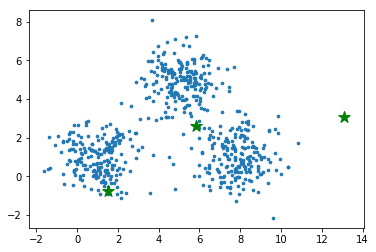

In [16]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

In [29]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new

array([[ 0.98676283,  0.93983092],
       [ 6.32307856,  3.00320272],
       [10.02733737,  1.30920711]])

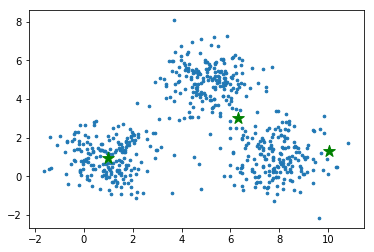

In [30]:
# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

# K-Mean Example

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the train and test datasets to create two DataFrames

train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

In [3]:
print("***** Train_Set *****")
print(train.head())
print("\n")
print("***** Test_Set *****")
print(test.head())

***** Train_Set *****
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

In [4]:
print("***** Train_Set *****")
print(train.describe())
print("\n")
print("***** Test_Set *****")
print(test.describe())

***** Train_Set *****
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


***** Test_Set *****
       PassengerId      Pclass      

In [5]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [7]:
# For the train set
train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [8]:
# For the train set
test.isnull().head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False


#### Let's get the total number of missing values in both datasets.

In [10]:
print("*****In the train set*****")
print(train.isnull().sum())
print("\n")
print("*****In the test set*****")
print(test.isnull().sum())

*****In the train set*****
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


*****In the test set*****
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [12]:
# Fill missing values with mean column values in the train set
train.fillna(train.mean(), inplace=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [13]:
# Fill missing values with mean column values in the test set
test.fillna(test.mean(), inplace=True)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00000,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.00000,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00000,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00000,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.00000,2,0,A/4 48871,24.1500,NaN,S


#### Let's see if you have any missing values in the train and test set.

In [15]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [16]:
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


#### Two features are left out which are not listed above in any of the categories. Yes, you guessed it right, Ticket and Cabin. Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric. Let see some sample values.

In [17]:
train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [18]:
train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [19]:
#Survival count with respect to Pclass:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [20]:
#Survival count with respect to Sex:

train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [21]:
#Survival count with respect to SibSp:

train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


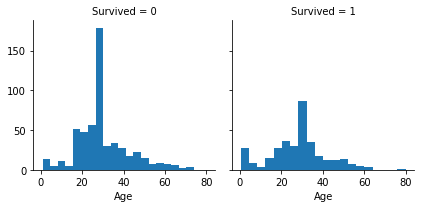

In [22]:
#Now it's time for some quick plotting. Let's first plot the graph of "Age vs. Survived":

g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

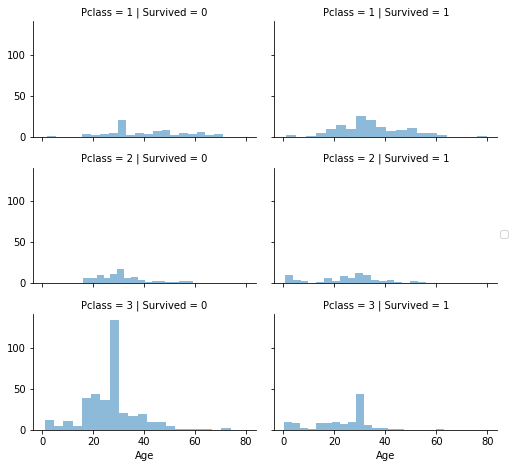

In [23]:
#Its time to see how the Pclass and Survived features are related to eachother with a graph:

grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [25]:
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

In [26]:
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])

In [27]:
# Let's investigate if you have non-numeric data left

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [28]:
#Note that the test set does not have the Survived feature.

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
dtypes: float64(2), int64(5)
memory usage: 22.9 KB


In [29]:
#Looks like you are good to go to train your K-Means model now.

#You can first drop the Survival column from the data with the drop() function.

X = np.array(train.drop(['Survived'], 1).astype(float))

In [30]:
y = np.array(train['Survived'])

In [31]:
  train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [32]:
#Let's now build the K-Means model.

kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.49158249158249157


In [34]:
kmeans = kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.5084175084175084


In [36]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.6262626262626263


# K-mean Example

In [4]:
from copy import deepcopy
from math import sqrt
from random import randrange
import sys

import matplotlib.pyplot as plt
import pandas as pd

# Constants
NUM_ITERATIONS = 100

# Functions -------------------------------------------------------------------
def find_cluster(cluster_list, data_pt):
    '''Assigns data point to nearest cluster'''
    cluster_dist_list = []
    for cluster in range(len(cluster_list)):
        cluster_dist = 0
        for dim in range(len(cluster_list[cluster])):
            cluster_dist += (data_pt[dim] - cluster_list[cluster][dim])**2
        cluster_dist_list.append(cluster_dist)

    return cluster_dist_list.index(min(cluster_dist_list))

# Main ------------------------------------------------------------------------
def main():
    if len(sys.argv) != 3:
        print('Usage: kmeans.py {/path/to/data_file} {# of clusters}')
        sys.exit(1)
    data_file = sys.argv[1]
    K = int(sys.argv[2])

    #read data into data frame
    data_pts = pd.read_table(data_file, sep='\t', header=None)
    num_features = len(data_pts.columns)  #if using real data

    #initialize clusters at randomly selected points
    clust_cents = []
    for i in range(K):
        clust = list(data_pts.ix[randrange(len(data_pts)),:num_features-1])
        clust_cents.append(clust)

    #Main Iteration
    for iteration in range(NUM_ITERATIONS):
        #assign data points to closest cluster (euclidean distance)
        for data_pt in range(len(data_pts)):
            cluster_ix = find_cluster(clust_cents, data_pts.ix[data_pt])
            data_pts.ix[data_pt,"Cluster"] = cluster_ix

        #move cluster centers to centroids
        old_clust_cents = deepcopy(clust_cents)
        for cluster in range(len(clust_cents)):
            cluster_data = data_pts[data_pts["Cluster"] == cluster]
            for dim in range(num_features):
                clust_cents[cluster][dim] = cluster_data[dim].mean()

        #breaks iteration if clusters don't move
        if old_clust_cents == clust_cents:
            print("Number of iterations:", iteration)
            break

    #print cluster features
    print("Cluster Locations:")
    for cluster in clust_cents:
        print(cluster)

    print("Cluster Sizes:")
    cluster_sizes = []
    for cluster in range(len(clust_cents)):
        cluster_sizes.append(len(data_pts[data_pts["Cluster"] == cluster]))
        print("Cluster #{0}:".format(cluster+1), 
              len(data_pts[data_pts["Cluster"] == cluster]))

    if K <= 6 and num_features == 2:
        #plot data points and centroids
        #only works for 2 features, max K=6
        colors = ["Red","Purple","LightGreen", "LightBlue", "Yellow", "Cyan"]
        markers = ["^", "*", "o", "s", "p", "x"]
        for data_pt in range(len(data_pts)):
            color = colors[int(data_pts.ix[data_pt,"Cluster"])]
            marker = markers[int(data_pts.ix[data_pt,2])]
            plt.scatter(data_pts.ix[data_pt,0],data_pts.ix[data_pt,1], 
                        s=50, c=color, marker=marker)
        for i in range(K):
            plt.scatter(clust_cents[i][0],clust_cents[i][1], 
                        s=100, c="Orange")
        plt.show()


if __name__ == '__main__':
    main()

ValueError: invalid literal for int() with base 10: 'C:\\Users\\musta\\AppData\\Roaming\\jupyter\\runtime\\kernel-954d5ac2-eb92-4cf3-a9fb-01dce764b4f3.json'